<a href="https://colab.research.google.com/github/DikRoman/praktikum.yandex/blob/master/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем бибилиотеку pandas и изучим файл, выведем несколько первых строк на экран

In [1]:
import pandas as pd
import numpy as np

# будем отображать графики прямо в jupyter'e

import seaborn as sns
import matplotlib.pyplot as plt

# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#прочтем данные и изучим их
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex.Prakticum/3. Продажа квартир в Санкт-Петербурге/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [4]:
df.info() #получим общее понимание набора данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


Выведем описание в транспонированном виде:

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",NaN,NaN,NaN,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00",NaN,NaN,NaN,"6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",NaN,NaN,NaN,60.35,35.65,12.00,40.00,52.00,69.90,900.00
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,"23,699.00",NaN,NaN,NaN,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",NaN,NaN,NaN,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",NaN,NaN,NaN,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",NaN,NaN,NaN,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",NaN,NaN,NaN,5.89,4.89,1.00,2.00,4.00,8.00,33.00
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Выведем на экран, сколько пропущенных значений мы имеем, а также процент пропусков по каждому столбцу

In [6]:
df.isnull().sum().sort_values() #посмотрим, сколько всего пропущенных значений мы имеем

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
#теперь посмотрим, какую долю занимают пропущенные значения в каждом столбце
df.isnull().sum().sort_values()/df.shape[0]*100

total_images            0.00
open_plan               0.00
floor                   0.00
rooms                   0.00
studio                  0.00
total_area              0.00
last_price              0.00
first_day_exposition    0.00
locality_name           0.21
floors_total            0.36
living_area             8.03
kitchen_area            9.61
days_exposition        13.42
ponds_around3000       23.28
parks_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ceiling_height         38.80
balcony                48.61
ponds_nearest          61.56
parks_nearest          65.91
is_apartment           88.29
dtype: float64

### Вывод

Мы имеем таблицу состоящую из 23699 строк, 22 столбцов.

Помимо пропусков мы видим, что у многих столбцов некорректный тип данных.

Пропущенные значения:
 - в колонке ceiling_height - высота потолков. Можно заменить на среднее значение.
 - в колонке floors_total - Общее кол-во этажей. Пропущено 86 значений, их можно приравнять к этажу квартиры.
 - в колонке is_apartment - апартаменты. Очевидно, NaN означает, что это квартира. Можно заменить на FALSE, так как это булево значение.
 - в колонке kitchen_area - площадь кухни. Вычислим площадь кухни как Общая площадь минус жилая площадь.
 - в колонке balcony - балконы. NaN, очевидно, отсутствие балконов. Заменим на 0.
 - locality_name - название населенного пункта. Пропущенных значений не много, заменим их на "Санкт-Петербург".
 - airports_nearest и cityCenters_nearest - расстояние. Заменим пропуски на среднее значение в зависимости от населенного пункта.
 - parks_nearest,  ponds_nearest  - поступим аналогично, вычислим среднее в зависимости от населенного пункта.
 - parks_around3000, parks_around3000 - отсутствие значений означает, вероятно, что в радиусе 3 км нет водоёмов и парков.
 - days_exposition - срок размещения объявления. NaN скорее всего означают, что объявление еще не снято с публикации, не будем производить замену на нули.

## Предобработка данных

Для начала, определим, где и как мы будем заменять значения.
1. пропуски в столбце с балконами заменим на 0;
2. высоту потолков заменим на среднюю высоту потолков в районе, где продается жилье;
3. пропущенные значения в этажности дома приравняем к этажу самой квартиры, по крайней мере это не сильно исказит данные;
4. данные по жилой площади вычислим как общую площадь минус площадь кухни. с площадью кухни поступим аналогично;
5. пропуски по количеству парков и водоёмов в радиусе 3-х километров заменим на нули, видимо в близи 3км их нет.
6. Столбец с апартаментам - is apartment - должен содержать True либо False. Заменим NaN на False.
NaN-ы по сроку размещения (days_exposition) заменять ни на что не будем.

Для начала приведем в порядок названия столбцов

In [8]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

В целом, наименования столбцов нас устраивают, кроме cityCenters_nearest - приведем наименования всех столбцов к нижнему регистру.
Также, заменим 3000 на 3km  в столбцах parks_around3000 и ponds_around3000, а расстояние до центра также укажем в километрах

In [9]:
cols = ['total_images',
 'last_price_ths_rub',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest_km',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest',
 'days_exposition']

df.set_axis(cols, axis = 'columns', inplace = True)

***Посмотрим, сколько памяти используется у нас на данный момент***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23699 non-null  int64  
 1   last_price_ths_rub       23699 non-null  float64
 2   total_area               23699 non-null  float64
 3   first_day_exposition     23699 non-null  object 
 4   rooms                    23699 non-null  int64  
 5   ceiling_height           14504 non-null  float64
 6   floors_total             23613 non-null  float64
 7   living_area              21796 non-null  float64
 8   floor                    23699 non-null  int64  
 9   is_apartment             2775 non-null   object 
 10  studio                   23699 non-null  bool   
 11  open_plan                23699 non-null  bool   
 12  kitchen_area             21421 non-null  float64
 13  balcony                  12180 non-null  float64
 14  locality_name         

На данный момент у нас используется 3.7 MB, постараемся уменьшить данное значение.

***1. Начнём обработку с балконов:***

In [11]:
df['balcony'].fillna(0, inplace=True) #заменим пропущенные значения по балконам на 0

In [12]:
df['balcony'].value_counts().sort_values() #сгруппируем кол-во балконов по группам, от 0 (балконов нет) , до 5-х

3.00       81
4.00      183
5.00      304
2.00     3659
1.00     4195
0.00    15277
Name: balcony, dtype: int64

***2. Далее, определим высоту потолков для пропущенных значений***


In [13]:
df['ceiling_height'] = df['ceiling_height'].apply(pd.to_numeric).astype('float16') #заменим тип данных в столбце на числовой

df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('mean'))
#заменим NaN на среднее по местоположению (логично, что в каждом районе будет типовая застройка)

Посмотрим, сколько пропущенных значений осталось в столбце "высота потолков"

In [14]:
df['ceiling_height'].isnull().sum()

156

Как мы видим, есть местоположения, у которых нет средний значений - они в единственном числе (таких значений 156). 
Поэтому их заменим на обычное среднее, это не сильно исказит наши данные.

In [15]:
df['ceiling_height'].fillna(value=df['ceiling_height'].mean(), inplace=True) 
#заменим оставшиеся значения на среднее значение высоты потолков по всей базе данных

***3. Обработаем столбец с указанием этажности дома***

In [16]:
df['floors_total'].fillna(df['floor'], inplace=True) 
#заменим пропущенные значения в столбце floors_total на те, что в столбце floor

***4. Обработаем столбец с данными по жилой площади квартиры и кухни***

In [17]:
df[df['living_area'].isnull()].head() #выведем на экран пропущенные значения в столбце living_area

,total_images,last_price_ths_rub,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.80,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.80,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,2.63,9.00,NaN,2,NaN,False,False,NaN,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,False,False,NaN,0.00,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18T00:00:00,1,2.80,22.00,NaN,3,NaN,False,False,NaN,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN


*Мы видим, что есть пропущенные значения как в столбце 	living_area, так и kitchen_area, значит мы не сможем посчитать их везде, где то придётся использовать долю жилой площади от общей.*

Расчитаем жилую площадь, имея точные данные по общей площади и площади кухни.
Т.к. тип данных в данном столбце - строковый, заменим на числовой.

In [18]:
df[["total_area","kitchen_area","living_area"]] = df[["total_area","kitchen_area","living_area"]].apply(pd.to_numeric).astype('float16')
#заменим тип данных в столбцах с площадью на числовой методом to_numeric

df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area'] - df.loc[df['living_area'].isna(), 'kitchen_area']
#расчитаем жилую площадь, как "общая" минус "кухня"

До данной операции в столбце living_area у нас было 1903 пропуска, посмотрим, сколько сейчас

In [19]:
df['living_area'].isnull().sum()

1464

Стало 1464 - прямо скажем, помогло не сильно. И тем не менее, чем меньше мы искажаем данные, тем лучше.

Какую долю в среднем занимает жилая площадь от площади всей квартиры?

In [20]:
mean_area = ((df['living_area'] / df['total_area'])).mean()
print('Доля жилой площади:', mean_area)

Доля жилой площади: 0.5693


Для заполнения остальных значений умножим общую площадь на найденную долю и заменим этим значением NaN-ы

In [21]:
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area'] * mean_area
#при помощи метода loc заменим в столбце living_area пропущенные значения, умножив значение в total_area на долю

Расчитаем площадь кухонь

In [22]:
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'total_area'] - df.loc[df['kitchen_area'].isna(), 'living_area']

***5. Заменим пропуски в столбце с парками и водоёмами в радиусе 3 км на нули, видимо их нет, поэтому они и не указаны.***

In [23]:
df['ponds_around_3km'].fillna(0, inplace=True)
df['parks_around_3km'].fillna(0, inplace=True)

***6. Преобразуем столбец с указанием апартаментов и изменим его тип***

In [24]:
df['is_apartment'].fillna('False', inplace=True)
df['is_apartment'] = df['is_apartment'].astype('bool')

Также, удалим строки с пропущенным значением locality_name, их всего 49, это не сильно исказит наши данные.

In [25]:
df = df.dropna(subset= ['locality_name']) #удалим строки
df['locality_name'].isna().sum() #узнаем кол-во пропусков

0

***Заменим пустые значения в столбцах airports_nearest, city_сenters_nearest, ponds_nearest, parks_nearest***

У нас есть столбцы с удаленностью от центра, аэропорта, расстоянием до ближайшего парк и водоема.
Заменим в них пустые значения на среднее растояние, сгруппированное по локации.
Перед этим заменим в столбцах тип даных на числовой.

In [26]:
df[["airports_nearest",
    "parks_nearest",     
    "ponds_nearest",          
    "days_exposition"
   ]] = df[["airports_nearest",
    "parks_nearest",    
    "ponds_nearest",          
    "days_exposition"]].apply(pd.to_numeric).astype('float16')
#заменим тип данных для столбцов airports_nearest, ponds_nearest, parks_nearest,days_exposition

In [27]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('mean'))

df['city_centers_nearest_km'] = df['city_centers_nearest_km'].fillna(df.groupby('locality_name')['city_centers_nearest_km'].transform('mean')).replace(np.nan, 0).astype('int32')

df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform('mean'))

df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform('mean'))

In [28]:
df.isnull().sum()

total_images                  0
last_price_ths_rub            0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5387
city_centers_nearest_km       0
parks_around_3km              0
parks_nearest              5998
ponds_around_3km              0
ponds_nearest              5494
days_exposition            3180
dtype: int64

Оставшиеся пустыми значения в столбцах с дальностью от аэропорта, ближайшим парком и водоёмом оставим пустыми, т.к. есть риск сильного искажения данных при применении средней или медианы (например, странно указывать 500м до парка там, где мы уже поставили отсутствие парков в радиусе 3 км).
Также, не будет заменять days_exposition на какие-либо значения, т.к. NaN в данном случае означает то, что объявление не снято с публикации.

**Теперь займёмся преобразованием типов данных**

До этого мы уже преобразовывали типы данных в некоторых столбцах, посмотрим на общую картину.

In [29]:
df.info() #получим общее понимание набора данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23650 non-null  int64  
 1   last_price_ths_rub       23650 non-null  float64
 2   total_area               23650 non-null  float16
 3   first_day_exposition     23650 non-null  object 
 4   rooms                    23650 non-null  int64  
 5   ceiling_height           23650 non-null  float16
 6   floors_total             23650 non-null  float64
 7   living_area              23650 non-null  float16
 8   floor                    23650 non-null  int64  
 9   is_apartment             23650 non-null  bool   
 10  studio                   23650 non-null  bool   
 11  open_plan                23650 non-null  bool   
 12  kitchen_area             23650 non-null  float16
 13  balcony                  23650 non-null  float64
 14  locality_name         

Мы видим, что осталось заменить тип данных в столбце floors_total, balcony, parks_around и ponds_around и нескольких других. 
Сделаем это

In [30]:
df['last_price_ths_rub'] = df['last_price_ths_rub'].apply(pd.to_numeric).astype('int32')

df['total_images'] = df['total_images'].apply(pd.to_numeric).astype('int8')

df['rooms'] = df['rooms'].apply(pd.to_numeric).astype('int8')

df['floor'] = df['floor'].apply(pd.to_numeric).astype('int8')

df['balcony'] = df['balcony'].apply(pd.to_numeric).astype('int8')

df['floors_total'] = df['floors_total'].apply(pd.to_numeric).astype('int8')

df['ponds_around_3km'] = df['ponds_around_3km'].apply(pd.to_numeric).astype('int32')

df['parks_around_3km'] = df['parks_around_3km'].apply(pd.to_numeric).astype('int32') 

Приведем столбцы с указанием расстояний из метров в километры

In [31]:
df['ponds_nearest'] = df['ponds_nearest'] / 1000

df['parks_nearest'] = df['ponds_nearest'] / 1000

df['airports_nearest'] = df['airports_nearest'] / 1000

df['city_centers_nearest_km'] = df['city_centers_nearest_km'] / 1000

In [32]:
df['last_price_ths_rub'] = df['last_price_ths_rub'] / 1000

In [33]:
df.sample(10)

,total_images,last_price_ths_rub,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
13217,11,"9,607.00",83.81,2016-06-10T00:00:00,3,2.80,10,46.91,6,True,False,False,11.60,2,Санкт-Петербург,24.26,5.88,1,0.00,2,0.43,213.00
1458,7,"4,350.00",45.00,2017-09-03T00:00:00,2,2.80,5,25.50,5,True,False,False,7.50,0,Санкт-Петербург,22.77,2.80,2,0.00,3,0.21,194.00
8318,17,"10,800.00",80.19,2018-09-20T00:00:00,3,3.00,5,56.00,2,True,False,False,9.00,0,Санкт-Петербург,11.32,8.84,1,0.00,3,0.92,76.00
16086,12,"4,950.00",41.59,2017-07-19T00:00:00,1,2.80,20,18.00,13,True,False,False,12.00,1,Санкт-Петербург,49.34,16.22,1,0.00,0,0.52,151.00
14494,15,"17,000.00",104.00,2018-10-08T00:00:00,3,2.80,16,60.00,8,True,False,False,14.40,2,Санкт-Петербург,30.72,8.01,0,0.00,2,0.25,NaN
23600,8,"8,700.00",132.00,2018-11-13T00:00:00,3,2.65,9,78.00,3,True,False,False,10.00,0,Санкт-Петербург,45.15,17.88,0,0.00,0,0.52,60.00
6822,19,"6,500.00",75.00,2018-10-25T00:00:00,4,2.50,9,49.00,9,True,False,False,6.00,1,Санкт-Петербург,50.08,14.92,1,0.00,0,0.52,19.00
7080,4,"6,700.00",64.00,2018-06-29T00:00:00,2,2.82,5,40.00,3,True,False,False,6.00,0,Санкт-Петербург,23.17,4.80,1,0.00,0,0.52,138.00
12974,14,"3,450.00",39.00,2017-03-21T00:00:00,1,2.65,12,20.00,12,True,False,False,10.20,1,Санкт-Петербург,15.62,14.41,1,0.00,0,0.52,345.00
22311,16,"2,800.00",45.19,2017-12-31T00:00:00,2,2.73,8,28.00,3,True,False,False,8.00,0,Выборг,NaN,0.00,0,NaN,0,NaN,49.00


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,650.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price_ths_rub,"23,650.00","6,541.13","10,896.40",12.19,"3,400.00","4,650.00","6,799.00","763,000.00"
total_area,"23,650.00",inf,inf,12.00,40.00,52.00,69.69,900.00
rooms,"23,650.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"23,650.00",inf,1.01,1.00,2.60,2.72,2.80,100.00
floors_total,"23,650.00",10.67,6.59,1.00,5.00,9.00,16.00,60.00
living_area,"23,650.00",inf,inf,2.00,19.00,30.00,42.50,571.00
floor,"23,650.00",5.89,4.88,1.00,2.00,4.00,8.00,33.00
kitchen_area,"23,650.00",inf,8.79,0.00,7.20,9.80,13.00,230.00
balcony,"23,650.00",0.59,0.96,0.00,0.00,0.00,1.00,5.00


Посмотрим, как изменились наши типы данных, а также сколько в итоге используется памяти и сколько нам удалось сэкономить.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23650 non-null  int8   
 1   last_price_ths_rub       23650 non-null  float64
 2   total_area               23650 non-null  float16
 3   first_day_exposition     23650 non-null  object 
 4   rooms                    23650 non-null  int8   
 5   ceiling_height           23650 non-null  float16
 6   floors_total             23650 non-null  int8   
 7   living_area              23650 non-null  float16
 8   floor                    23650 non-null  int8   
 9   is_apartment             23650 non-null  bool   
 10  studio                   23650 non-null  bool   
 11  open_plan                23650 non-null  bool   
 12  kitchen_area             23650 non-null  float16
 13  balcony                  23650 non-null  int8   
 14  locality_name         

Можем также вывести средний показатель использования используется памяти по разным типам данных.

Средние показатели по использованию памяти для данных разных типов выглядят так:

In [36]:
for dtype in ['bool', 'float16', 'float32', 'int32', 'int8', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for bool columns: 0.06 MB
Average memory usage for float16 columns: 0.07 MB
Average memory usage for float32 columns: 0.11 MB
Average memory usage for int32 columns: 0.12 MB
Average memory usage for int8 columns: 0.05 MB
Average memory usage for object columns: 1.68 MB


Ранее мы посчитали, что затрачивается 3.7 МБ памяти, сейчас 1.8 МБ. Таким образом нам удалось сэкономить практически 50% памяти.
Эти сведения дают нам понять то, что большая часть памяти уходит на 2 столбца, хранящих объектные значения, а именно наименования локации продажи и даты размещения объявления.

**Вывод**

Мы определили и изучили пропущенные значения и заменили пропущенные значения там, где это было наиболее необходимо. 

укажите причины, которые могли привести к пропускам в данных.

Пропущеные значения могут быть обусловлены человеческим фактором: 
Какие-то значения пропущены случайно, некоторые - из-за того, что эти значения попросту отсутствуют.

Мы заменили типы данных в следующих столбцах на числовой (float): last_price, total_area, ceiling_height, living_area, kitchen_area, airports_nearest, parks_nearest, ponds_nearest - в данных столбцах содержатся значения расстояний и площади, а также высота.

Столбец city_centers_nearest изменили на тип данных int32 для экономии места и для удоства, представив его значения целочисленными.

Столбец is apartment - заменили на тип данных bool, т.к. столбец содержит булево значение.

Столбцы floors_total, floor, balcony, parks_around3000,  мы заменили тип данных на int, т.к. вряд ли кто-то будет указывать 1,5 этажа или 0.5 парка.

## Расчёты и добавление результатов в таблицу

На данном этапе нам необходимо: 
1. Рассчитать цену квадратного метра;
2. Определить день недели, месяц и год публикации объявления;
3. Категоризировать данные: этаж квартиры; варианты — первый, последний, другой;
4. Рассчитать соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Посчитаем и добавим цену за квадратный метр**

In [37]:
df['price_per_sqr'] = df['last_price_ths_rub']/df['total_area'] #разделим общую стоимость квартиры на площадь

In [38]:
df.head()

,total_images,last_price_ths_rub,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_sqr
0,20,"13,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18.86,16.03,1,0.00,2,0.75,NaN,120.37
1,7,"3,350.00",40.41,2018-12-04T00:00:00,1,2.64,11,18.59,1,True,False,False,11.00,2,посёлок Шушары,12.82,18.60,0,0.00,0,0.57,81.00,82.91
2,10,"5,196.00",56.00,2015-08-20T00:00:00,2,2.80,5,34.31,4,True,False,False,8.30,0,Санкт-Петербург,21.74,13.93,1,0.00,2,0.57,558.00,92.79
3,0,"64,900.00",159.00,2015-07-24T00:00:00,3,2.80,14,90.50,9,True,False,False,68.50,0,Санкт-Петербург,28.10,6.80,2,0.00,3,0.23,424.00,408.18
4,2,"10,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31.86,8.10,2,0.00,1,0.05,121.00,100.00


Добавим в таблицу также день недели, месяц и год публикации объявления

In [39]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [40]:
df['weekday'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year.astype('object') #т.к. значение числовое, заменим на object

Добавим столбец с категорией по вариантам этажей: первый, последний, другой


In [41]:
def floor_position(value):
    if value['floor'] == 1:
        return 'Первый'
    elif value['floor'] == value['floors_total']:
        return 'Последний'
    return 'Другой'

In [42]:
df['floor_position'] = df.apply(floor_position, axis=1) #добавим в таблицу столбец с категориями по этажу
df.sample(10)

,total_images,last_price_ths_rub,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_sqr,weekday,month,year,floor_position
967,12,"5,500.00",71.00,2017-07-26,2,2.80,9,42.00,7,True,False,False,11.00,0,посёлок Тельмана,NaN,0.00,0,NaN,0,NaN,198.00,77.46,Wednesday,July,2017,Другой
5325,8,"2,690.00",30.59,2017-08-31,1,2.80,9,15.40,8,True,False,False,7.90,0,Санкт-Петербург,37.66,11.41,1,0.00,0,0.52,195.00,87.93,Thursday,August,2017,Другой
8628,0,"8,000.00",48.91,2018-02-23,1,2.80,6,27.84,4,True,False,False,21.06,0,Санкт-Петербург,28.05,5.74,2,0.00,0,0.52,60.00,163.58,Friday,February,2018,Другой
5488,18,"17,226.00",95.69,2018-01-01,2,3.00,7,31.30,4,False,False,False,38.00,0,Санкт-Петербург,39.94,10.72,1,0.00,3,0.30,298.00,180.02,Monday,January,2018,Другой
16995,10,"7,600.00",69.81,2018-08-12,2,2.80,7,35.50,7,True,False,False,16.80,1,Санкт-Петербург,17.95,16.95,1,0.00,3,0.36,14.00,108.86,Sunday,August,2018,Последний
2797,12,"1,750.00",23.00,2018-11-02,1,2.68,7,15.00,2,True,False,False,8.00,0,Всеволожск,NaN,0.00,0,NaN,0,NaN,20.00,76.09,Friday,November,2018,Другой
22718,3,"5,571.36",77.38,2018-12-09,2,2.75,6,47.97,5,True,False,False,29.41,0,городской посёлок Новоселье,NaN,0.00,0,NaN,0,NaN,60.00,72.00,Sunday,December,2018,Другой
21761,14,"6,900.00",59.69,2017-02-13,2,2.80,9,33.41,7,True,False,False,8.40,0,Санкт-Петербург,40.48,12.17,1,0.00,2,0.69,49.00,115.60,Monday,February,2017,Другой
7308,18,"6,980.00",73.88,2018-04-03,3,3.28,4,52.69,3,True,False,False,6.80,0,Санкт-Петербург,20.29,3.32,1,0.00,1,0.68,NaN,94.48,Tuesday,April,2018,Другой
12627,12,"3,950.00",36.00,2018-08-17,1,2.70,9,18.50,1,True,False,False,11.00,0,Кудрово,NaN,0.00,0,NaN,0,NaN,NaN,109.72,Friday,August,2018,Первый


Найдем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [43]:
df['ratio_sqr_liv_tot_m2'] = df['living_area']/df['total_area'] #соотношение жилой и общей площади (living/total)

In [44]:
df['ratio_sqr_kt_tot_m2'] = df['kitchen_area']/df['total_area'] #отношение площади кухни к общей (kitcnen/total)

In [45]:
df.head()

,total_images,last_price_ths_rub,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_sqr,weekday,month,year,floor_position,ratio_sqr_liv_tot_m2,ratio_sqr_kt_tot_m2
0,20,"13,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18.86,16.03,1,0.00,2,0.75,NaN,120.37,Thursday,March,2019,Другой,0.47,0.23
1,7,"3,350.00",40.41,2018-12-04,1,2.64,11,18.59,1,True,False,False,11.00,2,посёлок Шушары,12.82,18.60,0,0.00,0,0.57,81.00,82.91,Tuesday,December,2018,Первый,0.46,0.27
2,10,"5,196.00",56.00,2015-08-20,2,2.80,5,34.31,4,True,False,False,8.30,0,Санкт-Петербург,21.74,13.93,1,0.00,2,0.57,558.00,92.79,Thursday,August,2015,Другой,0.61,0.15
3,0,"64,900.00",159.00,2015-07-24,3,2.80,14,90.50,9,True,False,False,68.50,0,Санкт-Петербург,28.10,6.80,2,0.00,3,0.23,424.00,408.18,Friday,July,2015,Другой,0.57,0.43
4,2,"10,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31.86,8.10,2,0.00,1,0.05,121.00,100.00,Tuesday,June,2018,Другой,0.32,0.41


**Вывод:**

Согласно поставленной задаче, мы сделали следующее:

- Нашли цену квадратного метра;
- Отдельно выделили день недели, месяц и год публикации объявления;
- Категоризировали квартиры по этажности: первый, последний, другой;
- Расчитали соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

Для начала, изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы для каждого параметра и проанализируем каждый их них.

Text(0.5, 1.0, 'Кол-во объявлений в зависимости от площади квартир, 2014-2019 гг.')

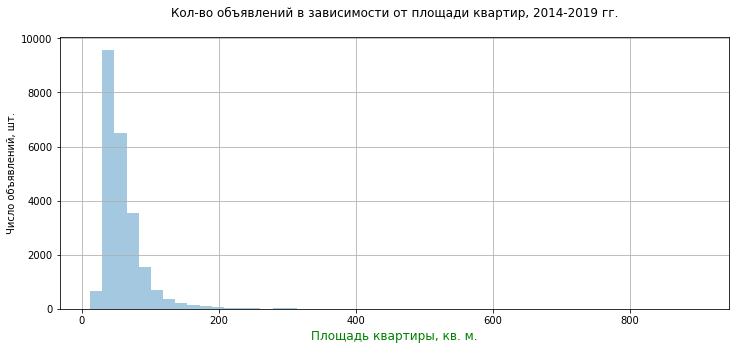

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 5) #Установим размер графика

sns.distplot(df["total_area"], hist=True, kde=False)
ax.grid(True) #добавим сетку

#  Добавляем подписи к осям:
ax.set_xlabel('Площадь квартиры, кв. м.',
        fontsize = 12,    #  размер шрифта
        color = 'green')    #  цвет шрифта
ax.set_ylabel('Число объявлений, шт.')

ax.set_title(r'Кол-во объявлений в зависимости от площади квартир, 2014-2019 гг.', pad = 20) #добавим название графику

In [47]:
df_less_200_sqrm = df.query('total_area <= 200') #сделаем срез данных и внимательнее посмотри на площадь квартир менее 200 кв.м.

Text(0.5, 1.0, 'Кол-во объявлений в зависимости от площади квартир (площадь менее 200 кв.м), 2014-2019 гг.')

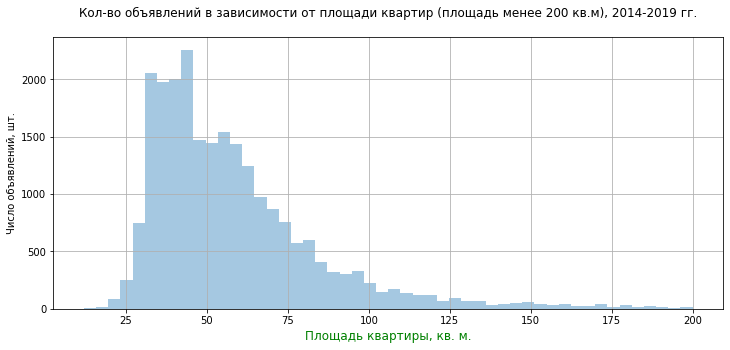

In [48]:
fig, ax = plt.subplots()

#Установим размер графика
fig.set_size_inches(12, 5) 

sns.distplot(df_less_200_sqrm["total_area"], hist=True, kde=False)
ax.grid(True) #добавим сетку

#  Добавляем подписи к осям:
ax.set_xlabel('Площадь квартиры, кв. м.',
        fontsize = 12,    #  размер шрифта
        color = 'green')    #  цвет шрифта
ax.set_ylabel('Число объявлений, шт.')

ax.set_title(r'Кол-во объявлений в зависимости от площади квартир (площадь менее 200 кв.м), 2014-2019 гг.', pad = 20)

Видим, что на площадь от 25 кв.м до 75 кв.м приходится основная масса квартир. 
Пик на значении около 40 кв.м. Это нормально: логично, что наиболее популярное жилье - это квартиры эконом-класса в пределах 30-40 кв.м.
Также наблюдаем, что продается очень мало квартир более 100 кв.м.


Text(0.5, 1.0, 'Кол-во объявлений по стоимости квартир, 2014 - 2019 гг.')

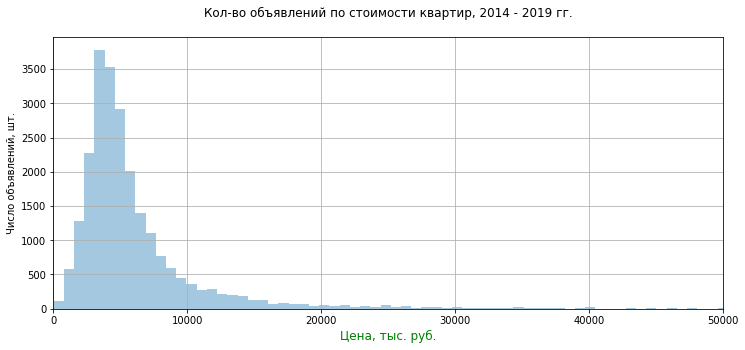

In [49]:
fig, ax = plt.subplots()

#Установим размер графика
fig.set_size_inches(12, 5) 

sns.distplot(df['last_price_ths_rub'], hist=True, kde=False, bins=1000)
ax.grid(True) #добавим сетку

#  Добавляем подписи к осям:
ax.set_xlabel('Цена, тыс. руб.',
        fontsize = 12,    #  размер шрифта
        color = 'green')    #  цвет шрифта
ax.set_ylabel('Число объявлений, шт.')

ax.set(xlim=(0, 50000))
ax.set_title(r'Кол-во объявлений по стоимости квартир, 2014 - 2019 гг.', pad = 20)

Наибольшее число квартир продается по цене до 10 млн. руб.
Практически нет квартир дороже 30 млн.
Встречаются объявления за 40 и 50 млн. руб., можем их посмотреть.
Также мы видим, что есть квартиры с крайне низкой ценой. Нужно понять, что это за квартиры.

Text(0.5, 1.0, 'Кол-во объявлений по числу комнат, 2014-2019 гг.')

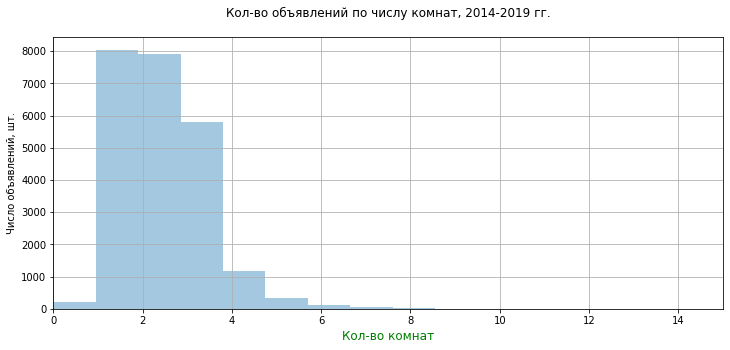

In [50]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 5) 

sns.distplot(df['rooms'], hist=True, kde=False, bins=20)
ax.grid(True) 

ax.set_xlabel('Кол-во комнат',
        fontsize = 12,    
        color = 'green')   
ax.set_ylabel('Число объявлений, шт.')

ax.set(xlim=(0, 15)) #поставим ограничения по оси Х
ax.set_title(r'Кол-во объявлений по числу комнат, 2014-2019 гг.', pad = 20)

Однокомнатные и двухкомнатные квартиры составляют основную массу в объявлениях о продажах; крайне мало квартир более 3-х комнат.

Text(0.5, 1.0, 'Кол-во объявлений по высоте потолков')

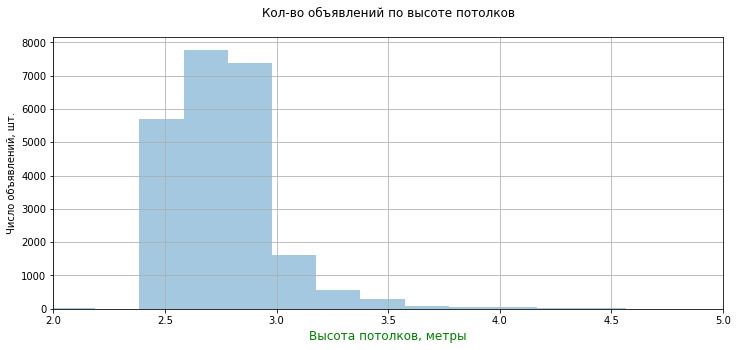

In [51]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 5) 

sns.distplot(df['ceiling_height'], hist=True, kde=False, bins=500)
ax.grid(True) 

ax.set_xlabel('Высота потолков, метры',
        fontsize = 12,    
        color = 'green')   
ax.set_ylabel('Число объявлений, шт.')

ax.set(xlim=(2, 5)) #поставим ограничения по оси Х высоту потолков от 2м
ax.set_title(r'Кол-во объявлений по высоте потолков', pad = 20)

Большинство объявлений о продаже приходится на потолки высотой от 2.5 до 3-х метров - стандартная высота

**Промежуточный вывод**

Итак, на данном этапе можно сказать, что наиболее типичный вариант о продаже квартиры в Санкт-Петербурге - это одно- двухкомнатные квартиры площадью 35-40 кв. метров, стоимостью около 5-7 млн. рублей, с высотой потолка 2.7 метра.

**Изучим время продажи квартиры**

Взглянем на гистограмму распределения объявлений о продаже во времени

Text(0.5, 1.0, 'Кол-во объявлений по сроку размещения, 2014-2019 гг.')

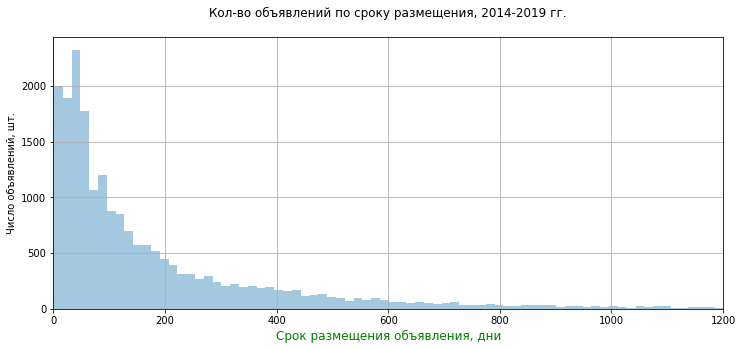

In [52]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 5) 

sns.distplot(df['days_exposition'], hist=True, kde=False, bins=100)
ax.grid(True) 

ax.set_xlabel('Срок размещения объявления, дни',
        fontsize = 12,    
        color = 'green')   
ax.set_ylabel('Число объявлений, шт.')

ax.set(xlim=(0, 1200)) #поставим ограничения по оси Х
ax.set_title(r'Кол-во объявлений по сроку размещения, 2014-2019 гг.', pad = 20)

Внимательнее рассмотрим распределение объявлений сроком до 100 дней

In [53]:
days_less_100 = df.query('days_exposition <=100')

Text(0.5, 1.0, 'Кол-во объявлений по сроку размещения, 2014-2019 гг.')

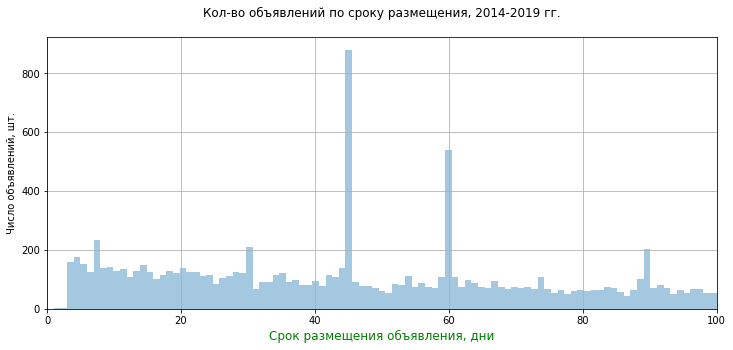

In [54]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 5) 

sns.distplot(days_less_100['days_exposition'], hist=True, kde=False, bins=100)
ax.grid(True) 

ax.set_xlabel('Срок размещения объявления, дни',
        fontsize = 12,    
        color = 'green')   
ax.set_ylabel('Число объявлений, шт.')

ax.set(xlim=(0, 100)) #поставим ограничения по оси Х
ax.set_title(r'Кол-во объявлений по сроку размещения, 2014-2019 гг.', pad = 20)

Есть аномальные всплески по сроку размещения 46 дней - порядка более 800 объявлений, 60 дней (т.е. 2 месяца) - около 600 объявлений. 

Расчитаем среднее и медиану, а также опишем, сколько обычно занимает продажа

In [55]:
df['days_exposition'].describe()

count   20,470.00
mean          inf
std           inf
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

(0.0, 1600.0)

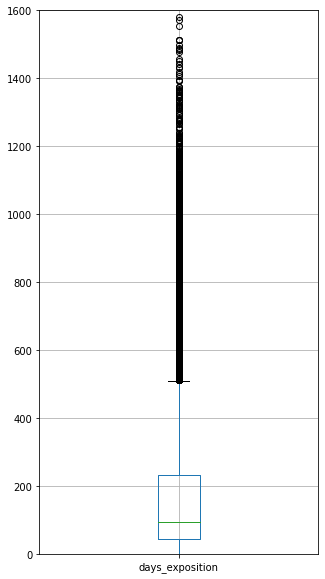

In [56]:
df.boxplot('days_exposition', figsize=(5, 10)) 

plt.ylim(0, 1600)

Мы видим, что большая часть квартир продается в диапазоне от 50 до 200 дней. Медианным значением является 95 дней - 3 месяца вполне нормальный срок для продажи квартиры. 

Можно также сказать, что быстрые продажи происходят от 1 до 45 дней, хотя в данном случае несколько дней могут представлять из себя просто снятие объявление с публикации, например собственник передумал продавать квартиру.
Продажи совершившиеся после 230 до 450 дней можно считать долгими, а свыше 450  - необычно долгими. Также мы видим, что максимальный срок продажи  - 1580 дней, что является аномальным значением (возможно, объявление забыли снять с публикации).

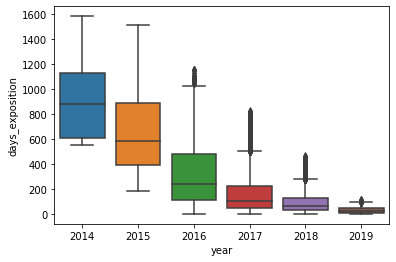

In [57]:
sns.boxplot(x='year', y='days_exposition', data=df);

Очевидный факт: Чем раньше было выставлено объявление, тем больше времени прошло до момента его снятия с публикации.

**Далее посмотрим, какие аномальные и выбивающиеся значения мы можем увидеть и уберем их**

In [58]:
df[['last_price_ths_rub',
 'total_area',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'kitchen_area',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest_km',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest',
 'days_exposition']].describe().T

,count,mean,std,min,25%,50%,75%,max
last_price_ths_rub,"23,650.00","6,541.13","10,896.40",12.19,"3,400.00","4,650.00","6,799.00","763,000.00"
total_area,"23,650.00",inf,inf,12.00,40.00,52.00,69.69,900.00
rooms,"23,650.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"23,650.00",inf,1.01,1.00,2.60,2.72,2.80,100.00
floors_total,"23,650.00",10.67,6.59,1.00,5.00,9.00,16.00,60.00
living_area,"23,650.00",inf,inf,2.00,19.00,30.00,42.50,571.00
floor,"23,650.00",5.89,4.88,1.00,2.00,4.00,8.00,33.00
kitchen_area,"23,650.00",inf,8.79,0.00,7.20,9.80,13.00,230.00
airports_nearest,"18,263.00",inf,NaN,0.00,18.62,26.88,37.34,inf
city_centers_nearest_km,"23,650.00",10.99,9.65,0.00,2.49,11.36,15.32,65.97


Выявили следующие редкие выбивающиеся значения:
- Квартира стоимостью 763 млн. руб.
- площадь 900 кв. метров
- 19 комнат
- высота потолка - 100 метров
- высота потолка - 1 метр
- жилая площадь - 2 кв. метра
- высота дома - 60 этажей

In [59]:
# Напишем функцию для удаления выбросов

def delete_outliers(df, column, graphic=0, x=10, y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1                                                                    # расчитаем интерквартильный размах
    net_settlement = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr)) # произведем расчет,очищенный от выбросов
    if graphic == 1:
        return df.loc[net_settlement].boxplot([column], figsize=(x,y))
    else:
        return df.loc[net_settlement]
    

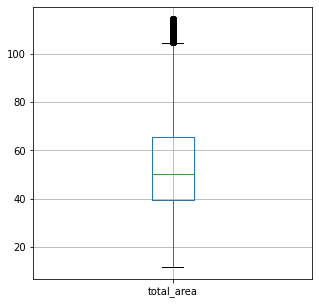

In [60]:
delete_outliers(df,'total_area',1,5,5) #выведем график без выбросов по общей площади

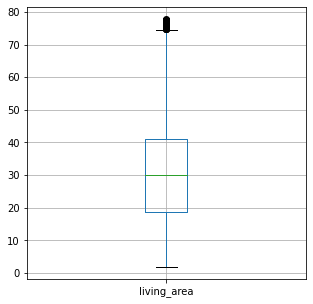

In [61]:
delete_outliers(df,'living_area', 1, 5,5) #выведем график без выбросов по жилой площади

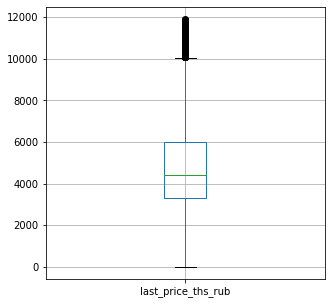

In [62]:
delete_outliers(df,'last_price_ths_rub',1, 5,5) #выведем график без выбросов по значениям стоимости квартир

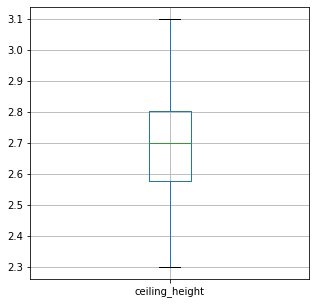

In [63]:
delete_outliers(df,'ceiling_height',1, 5,5) #выведем график без выбросов по высоте потолков

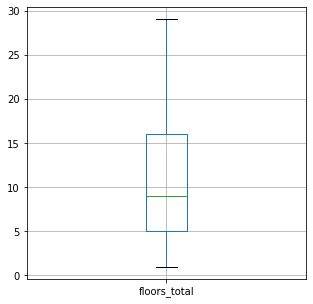

In [64]:
delete_outliers(df,'floors_total',1, 5,5)

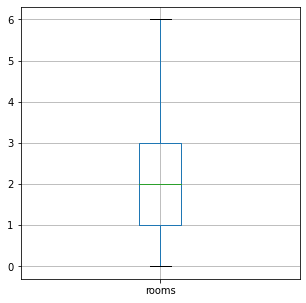

In [65]:
delete_outliers(df,'rooms',1, 5,5)

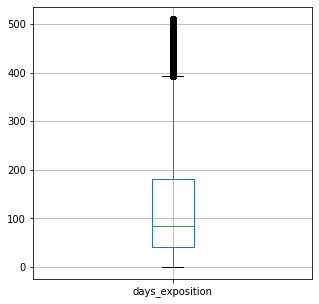

In [66]:
delete_outliers(df,'days_exposition',1, 5,5)

**Какие факторы больше всего влияют на стоимость квартиры?**

Для этого взглянем на корреляции количественных признаков.

In [67]:
corr_matrix = df[['last_price_ths_rub',
 'total_area',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'kitchen_area',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest_km',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest']].corr() 

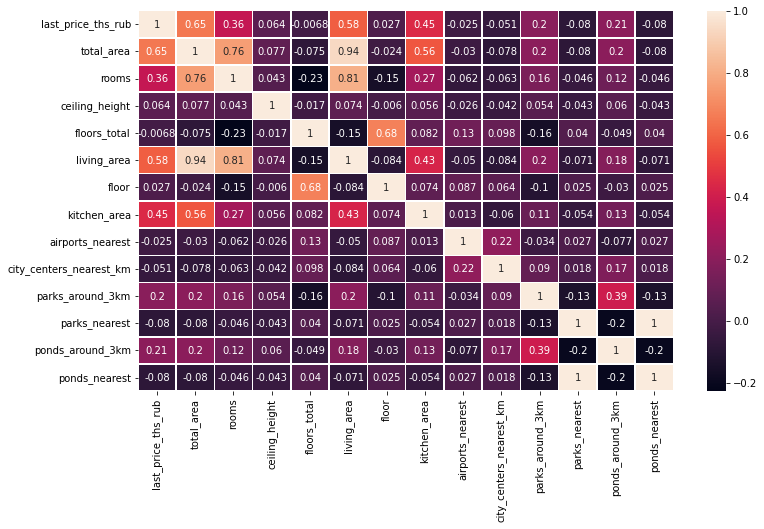

In [68]:
fig, ax = plt.subplots(figsize=(12,7)) 
sns.heatmap(corr_matrix, annot=True, linewidths=.5);

По раскрашенной матрице корреляций видно, что цена квартиры (last_price_ths_rub) больше всего (на 65%) зависит от площади квартиры. На 36% - от количества комнат. Также есть зависимость от удаленности от центра (21%) - чем меньше расстояние до центра тем выше стоимость квартиры. 

**Изучим, какие факторы больше всего влияют на стоимость квартир.**

Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

(0.0, 14000.0)

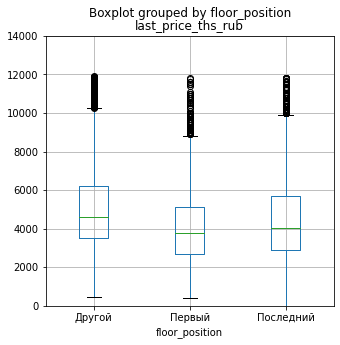

In [69]:
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='floor_position',figsize=(5,5)).set_ylim(0,14000)
#выведем график boxplot сгруппированный по этажу квартиры

На первом этаже наиболее дешевые квартиры, а самые дорогие на других, кроме первого и последнего. 
Однако медианная стоимость квартиры на последнем и первом этаже различается не сильно и находится в районе 4 млн. руб. 
Возможно, это связано с такими факторами как:
- квартиры на первом этаже больше подвержены вредителям и в них больше шума с улицы.
- у квартир на последнем этаже могут быть проблемы с коммуникациями (протекать потолок, если нет технического этажа). Если это 5-ти этажный дом, то там может отсутствовать лифт и подниматься придётся пешком.

Из графика видно, что нет абсолютно никакой разницы, в какой день было выложено объявление

(0.0, 14000.0)

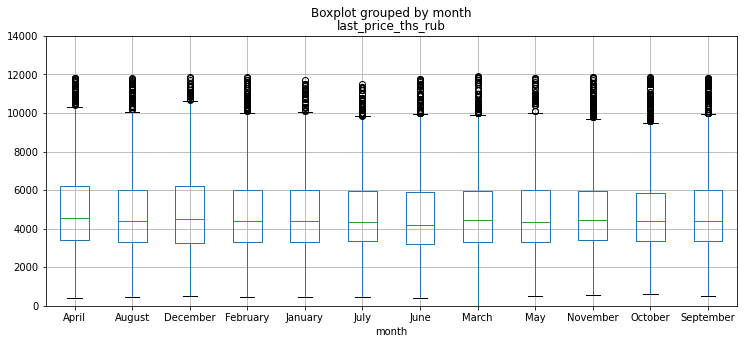

In [70]:
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='month',figsize=(12,5)).set_ylim(0,14000)

Также и с месяцем - мы не обнаруживаем существенного влияния месяца на цену.

(0.0, 14000.0)

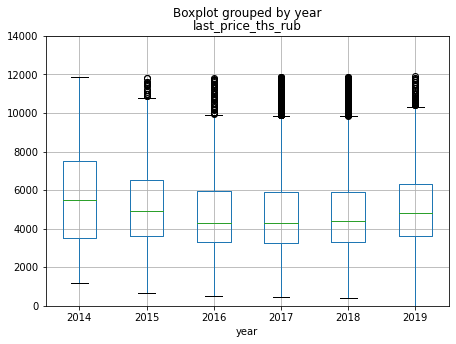

In [71]:
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='year',figsize=(7,5)).set_ylim(0,14000)

Однако мы видим, что цены отличаются год от года: ниже всего было в 2016-2017 годах, дороже всего в 2014. Скорее всего на это повлияли макроэкономические факторы. Нужно более подробное исследование с анализом внешних источников, на данный момент в этом нет необходимости.

In [72]:
table_price_year = pd.pivot_table(df, 
                       values='last_price_ths_rub', 
                       index='year',
                       aggfunc={'last_price_ths_rub':['count', 'mean']})
table_price_year.sort_values('mean')

,count,mean
year,,
2018,8512,"5,952.22"
2017,8185,"6,585.82"
2019,2879,"6,782.39"
2016,2765,"6,829.41"
2015,1173,"8,592.73"
2014,136,"12,046.60"


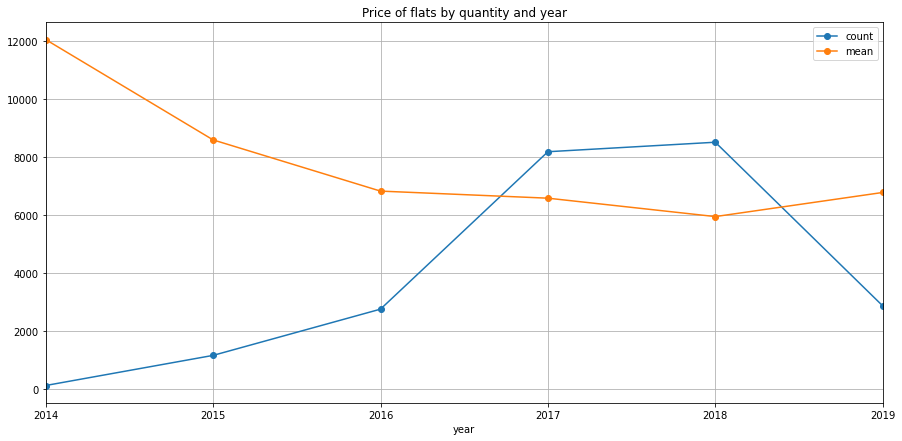

In [73]:
table_price_year.plot(style='o-', xlim=(2014, 2019), grid=True, figsize=(15, 7), title='Price of flats by quantity and year') 

По графику мы видим, что рост числа объявлений растет от года к году вплоть до 2018 года (8 512 объявлений), после чего снижается до 2879 в 2019 году. В то же время наблюдается снижение средней цены - 12 млн. руб. в 2014, в 2018 году уже 5,9 млн. руб.

**Выберите 10 населённых пунктов с наибольшим числом объявлений**
 - Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
 - Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья

Посмотрим на 10 населённых пунктов с наибольшим числом объявлений

In [74]:
list_name = df['locality_name'].value_counts().head(10)

print(list_name)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [75]:
locality_list_name = ['Санкт-Петербург','посёлок Мурино','посёлок Шушары','Всеволожск','Пушкин','Колпино','посёлок Парголово','Гатчина','деревня Кудрово','Выборг']
#поместим наменования населенных пунктов в список locality_list_name

In [76]:
df_query = df.query('locality_name in @locality_list_name') #сделаем срез таблицы непосредственно по выявленным наименованиям

Построим сводную таблицу, в которой будет указано наименование населенного пункта и средняя цена за квадратный метр

In [77]:
table = pd.pivot_table(df_query, 
                       values='price_per_sqr', 
                       index='locality_name',
                       aggfunc={'price_per_sqr': ['count', 'mean']})
table.sort_values('mean')

,count,mean
locality_name,,
Выборг,237,58.14
Всеволожск,398,68.65
Гатчина,307,68.75
Колпино,338,75.42
посёлок Шушары,440,78.68
посёлок Мурино,522,85.75
посёлок Парголово,327,90.18
деревня Кудрово,299,92.47
Пушкин,369,103.13


Как мы видим, самая дорогая цена за квадратный метр в Санкт-Петербурге, самая дешевая - в Выборге.
Возможно, это отчасти связано со спросом/предложением - кол-во объявлений в Выборге наименьшее из нашейго Топ-10 локаций, 237 объявлений в Выборге и 15 тысяч в Санкт-Петербурге, и это за период с 2014 по 2019 годы. 
Приобретение недвижимости в Выборге не популярно среди покупателей.

**Выясним, какая область входит в центр** 

У нас имеется столбец с расстоянием до центра в километрах (city_centers_nearest_km), округлим до целых значений.

In [78]:
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round(0)

Посчитаем среднюю цену для каждого километра

In [79]:
#сделаем сводную таблицу по столбцам 'city_centers_nearest_km' и 'last_price_ths_rub'

city_dist_center_price_pvt = df.pivot_table(values='last_price_ths_rub', index='city_centers_nearest_km').round(0)
city_dist_center_price_pvt.head(10)

,last_price_ths_rub
city_centers_nearest_km,
0.00,"3,141.00"
1.00,"21,207.00"
2.00,"17,788.00"
3.00,"11,127.00"
4.00,"13,304.00"
5.00,"14,499.00"
6.00,"15,338.00"
7.00,"14,775.00"
8.00,"9,958.00"


Построим график, который будет показывать, как цена зависит от удалённости от центра

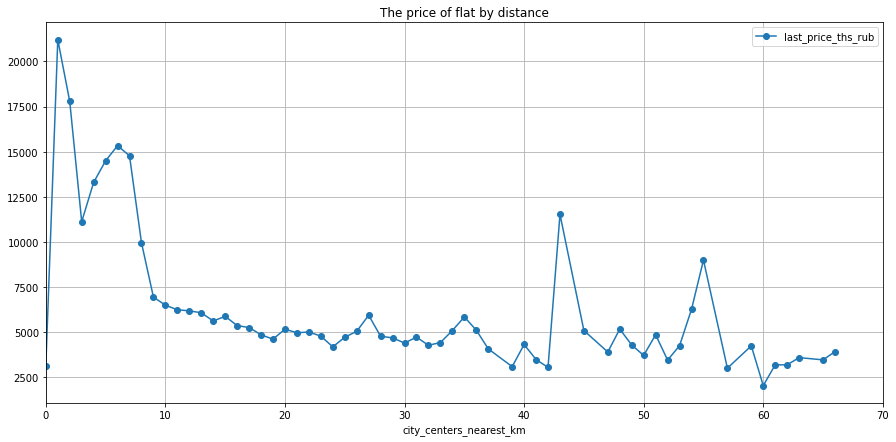

In [80]:
city_dist_center_price_pvt.plot(style='o-', xlim=(0, 70), grid=True, figsize=(15, 7), title='The price of flat by distance') 

По графику видно, что резкий спад стоимости квартир происходит в районе 10 км от центра Санкт-Петербурга. После 10 км стоимость достаточно стабильная, хотя наблюдаются некоторые всплески - возможно, это элитные постройки, котеджи и загородные дома.
В целом - чем дальше от центра, тем ниже цена.

**Изучим сегмент квартир расположенных в центре города**

 - Выделим сегмент квартир в центре. 
 - Проанализируем территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
 - Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [81]:
#сделаем срез данных, получив информацию по объявлениям о продаже квартир находящимся в пределах 10 км от центра
maximum_km = 10.0
df_center_sp = df.query('city_centers_nearest_km <= @maximum_km') 

In [82]:
df_center_sp.describe() #посмотрим на полученные данные

,total_images,last_price_ths_rub,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest_km,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_sqr,ratio_sqr_liv_tot_m2,ratio_sqr_kt_tot_m2
count,"10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","10,820.00","5,434.00","10,820.00","10,820.00","5,434.00","10,820.00","5,434.00","9,169.00","10,820.00","10,820.00","10,820.00"
mean,9.64,"7,708.26",inf,2.21,2.84,8.71,inf,4.94,inf,0.51,26.37,3.07,0.47,0.00,0.57,0.49,inf,98.44,0.58,0.21
std,5.70,"15,573.75",inf,1.21,1.34,5.88,inf,4.17,10.52,0.90,7.53,3.57,0.79,0.00,0.96,0.21,inf,69.51,0.11,0.10
min,0.00,12.19,12.00,0.00,1.20,1.00,2.00,1.00,0.00,0.00,9.56,0.00,0.00,0.00,0.00,0.02,2.00,0.11,0.02,0.00
25%,5.00,"2,763.75",41.50,1.00,2.60,5.00,20.00,2.00,8.00,0.00,21.76,0.00,0.00,0.00,0.00,0.38,45.00,60.00,0.51,0.13
50%,9.00,"4,490.00",55.00,2.00,2.75,6.00,31.59,4.00,10.00,0.00,25.12,0.00,0.00,0.00,0.00,0.52,106.00,88.86,0.57,0.18
75%,14.00,"8,003.85",76.00,3.00,2.88,11.00,46.00,6.00,14.00,1.00,31.12,6.00,1.00,0.00,1.00,0.54,265.00,118.81,0.65,0.26
max,50.00,"763,000.00",900.00,19.00,100.00,28.00,571.00,27.00,230.00,5.00,44.83,10.00,3.00,0.00,3.00,1.31,"1,580.00","1,907.50",1.00,0.91


В центре города мы видим порядка 5 тысяч объявлений. Средняя площадь - 82 кв. метра. В целом квартиры в центре отличаются большой площадью кухонь и комнат. Средняя цена - 12 млн. руб., при этом медианная - 8 млн. Число комнат от двух, в среднем 2-3 комнатные квартиры. Медианная цена квадратного метра - 117 тыс. руб.

Для дальнейшего анализа зависимости цены от других параметров, вызовем матрицу корреляции и изучим ее.

In [83]:
#рассмотри зависимость цены квартиры в центре  от общей площади, 
#кол-ва комнат, высоты потолков, удаленности от центра и расположения этажа

corr_matrix_center_sp = df_center_sp[['last_price_ths_rub',
 'total_area',
 'rooms',
 'ceiling_height',
 'city_centers_nearest_km',
 'floor_position']].corr() 

Рассмотри матрицу кореляции по квартирам в центре, а ниже для удобства рассмотрим матрицу, которую анализировали ранее выше.

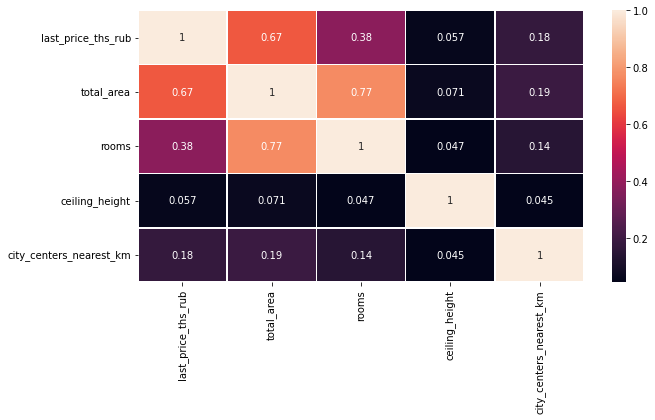

In [84]:
#матрица для квартир в центре

fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr_matrix_center_sp, annot=True, linewidths=.5);

In [85]:
#рассмотрим матрицу для квартир в целом по городу и пригороду Санкт-Петербурга, параметры одинаковые

corr_matrix = df[['last_price_ths_rub',
 'total_area',
 'rooms',
 'ceiling_height',
 'city_centers_nearest_km',
 'floor_position']].corr()

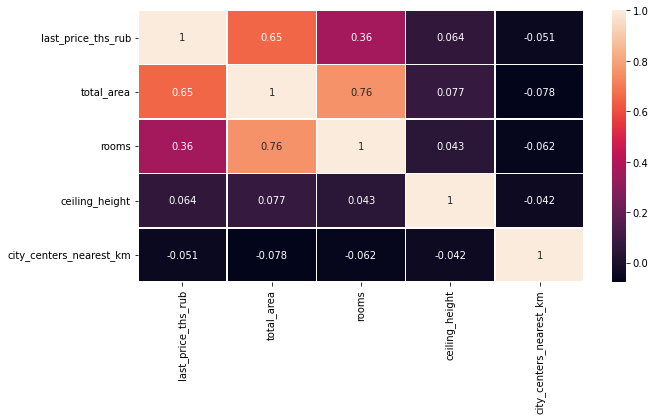

In [86]:
fig, ax = plt.subplots(figsize=(10,5)) 

sns.heatmap(corr_matrix, annot=True, linewidths=.5);

Больших различий во влиянии на цену квартиры между центром и в целом по городу не обнаружено. Однако они есть:
- В целом по городу влиние на стоимость квартиры от высоты потолков выше, чем в самом центре города.
- Также, видимо, чем дальше от центра - тем выше влияние расстояния на стоимость квартиры (чем дальше, тем дешевле). 

Выясним, есть ли влияние времени публикацию на стоимость квартир в центре и в целом по городу.
Сравним наблюдения.

Изучим влияние времени публикации на стоимость в центре:

(0.0, 14000.0)

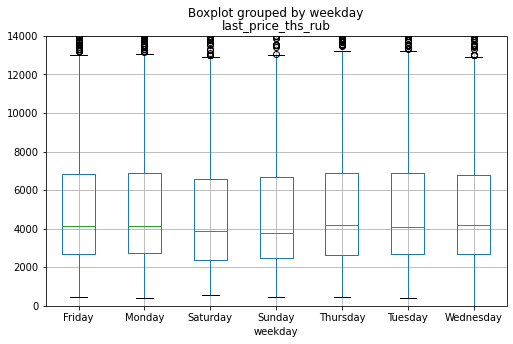

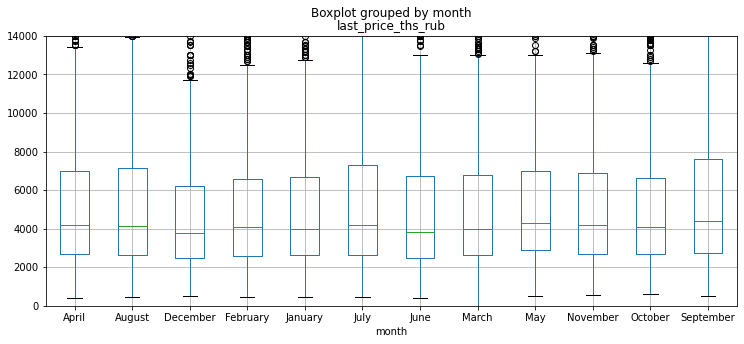

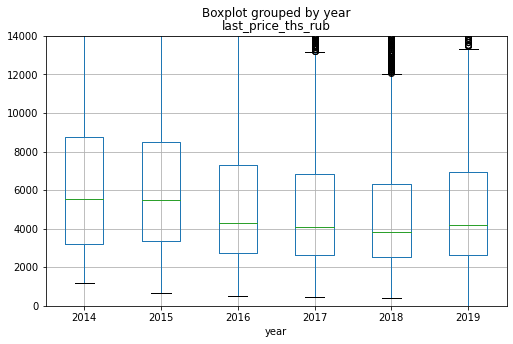

In [87]:
delete_outliers(df_center_sp,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='weekday',figsize=(8,5)).set_ylim(0,14000)
delete_outliers(df_center_sp,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='month',figsize=(12,5)).set_ylim(0,14000)
delete_outliers(df_center_sp,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='year',figsize=(8,5)).set_ylim(0,14000)

Ранее мы уже использовали подобный график в нашем анализе, для удобства рассмотрим его еще раз.
Сравним, есть ли разница

(0.0, 14000.0)

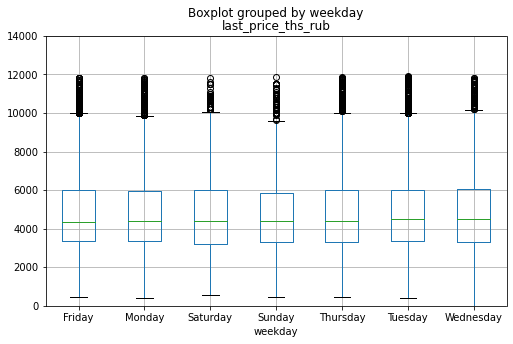

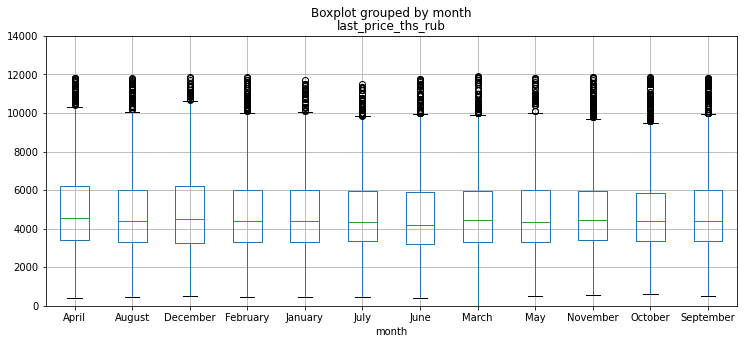

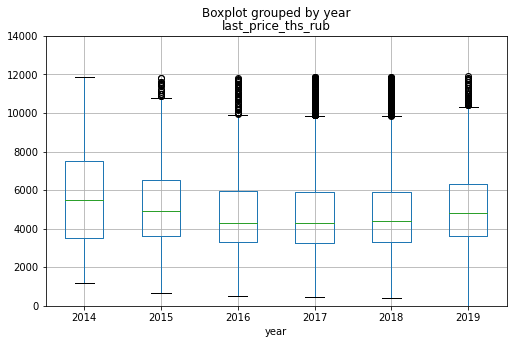

In [88]:
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='weekday',figsize=(8,5)).set_ylim(0,14000)
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='month',figsize=(12,5)).set_ylim(0,14000)
delete_outliers(df,'last_price_ths_rub',0).boxplot('last_price_ths_rub', by='year',figsize=(8,5)).set_ylim(0,14000)

Как и ожидалось, время публикации не имеет существенного влияния на цену квартиры ни для центра города, ни вообще.

В целом можно сказать, что существенных различий во влиянии на стоимость квартиры в центре и по городу не выявлено, кроме самого фактора удаленности от центра.

## Общий вывод


В целом по Санкт-Петербургу мы наблюдаем снижение средней цены - 12 млн. руб. в 2014, в 2018 году уже 5,9 млн. руб.

- Типичный портрет объявления о продаже квартиры в Санкт-Петербурге: двухкомнатные квартиры эконом-класса площадью 35-40 кв. метров, стоимостью около 5-7 млн. рублей, с высотой потолка 2.7 метра.

- В центре Санкт-Петербурга квартиры стоят дороже, чем за его пределами и близлежащих регионах (самые дешевые - в Выборге). 
 237 объявлений в Выборге и 15 тысяч в Санкт-Петербурге. Соответственно наибольший спрос на квартиры - в Санкт-Петербурге. 
 
 При этом, центром Санкт-Петербурга является область в радиусе 10 километров от центра города. 
 Средняя площадь квартир в центре города - 82 кв. метра. Средняя цена - 12 млн. руб., медианная - 8 млн.руб.
 Число комнат от двух, в среднем 2-3 комнатные квартиры. Медианная цена квадратного метра - 117 тыс. руб.
 
- Цена квартиры больше всего, а именно на 65%, зависит от площади квартиры. 
- На 36% - от количества комнат. 
- Также есть зависимость от удаленности от центра (21%) - чем меньше расстояние до центра тем выше стоимость квартиры. 

Однокомнатные и двухкомнатные квартиры составляют основную массу в объявлениях о продажах; крайне мало квартир более 3-х комнат.

- Наиболее влияние на стоимость оказывает: удаленность от центра, площадь квартиры, кол-во комнат и этаж.
- На первом и последнем этаже квартиры в целом дешевле, чем на других.
- Время и дата публикации объявления не имеют существеннго влияния и нет никакой разницы, в какой день было выложено объявление.


В среднем квартира продается сроком до 100 дней, большая часть (75%) продается до 230 дней, 
Мы видим, что большая часть квартир продается в диапазоне от 50 до 200 дней. Медианным значением является 95 дней - 3 месяца вполне нормальный срок для продажи квартиры.


Возможно, стоит уделить больше внимания правилам валидации при заполнении объявлений, чтобы больше не сталкиваться с проблемой отсутствующих значений. 
Также, лучше будет если расстояния будут указаны в целых числах.
Для продавцов было бы удобно показывать, сколько в целом могут стоить квартиры в его доме.
Можно также подумать над автоматическим заполнением таких значений, как удаленность от центра, аэропорта, парков и водоёмов. 
Зачастую люди могут просто не задумываться об этом.